In [1]:
import re
import pandas as pd

In [2]:
import sys
sys.path.insert(1, '../../..')
from medicine.models.compound import Compound 

In [3]:
c_names = [c.name for c in Compound.query.all()]
c_names[0:5]

F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


['滅瘢痕', '闢禳時疫', '身體白駁', '目不得瞑', '汗後奔豚']

In [4]:
word_list = []

for c_name in c_names:
    c_name = re.sub('(\s|KT)', '', c_name)
    sentences = re.split('\W', c_name)
    cut_word = []
    for sentence in sentences:
        cut_word.extend([word for word in sentence])
        cut_word.extend([sentence[i:i+2] for i in range(len(sentence)-1)])
    word_list.append(cut_word)

word_list[0:5]

[['滅', '瘢', '痕', '滅瘢', '瘢痕'],
 ['闢', '禳', '時', '疫', '闢禳', '禳時', '時疫'],
 ['身', '體', '白', '駁', '身體', '體白', '白駁'],
 ['目', '不', '得', '瞑', '目不', '不得', '得瞑'],
 ['汗', '後', '奔', '豚', '汗後', '後奔', '奔豚']]

In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(word_list).transform(word_list)
df_name = pd.DataFrame(te_ary, columns=te.columns_)
print(df_name.shape)
df_name.head(5)

(5815, 9779)


,一,一二,一人,一分,一切,一升,一女,一字,一宿,一寸,...,龈風,龍,龍丸,龍症,龍纏,龍膽,龍香,龜,龜病,龜背
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 15
lda = LatentDirichletAllocation(n_topics=n_topics, 
                                max_iter=20,
                                learning_method='batch')
docres = lda.fit_transform(df_name)

F:\Python\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [7]:
def print_top_words(model):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic #%d:" % topic_idx)
        print(' '.join([df_name.columns[index] for index in topic.argsort()[ : -10-1 : -1]]))

In [8]:
print_top_words(lda)

Topic #0:
後 産 産後 發 寒 脫 足 肛 傷 背
Topic #1:
兒 小 小兒 嗽 不 咳 熱 痢 目 咳嗽
Topic #2:
中 亂 霍 霍亂 不 出 身 筋 風 補
Topic #3:
不 血 止 不止 吐 下 吐血 血不 食 胃
Topic #4:
氣 舌 木 瘡 腫 悶 不 毒 石 牙疳
Topic #5:
毒 瘡 腫 惡 癰 渴 初 起 諸 消
Topic #6:
便 不 小 小便 通 不通 淋 便不 血 痛
Topic #7:
風 腹 牙 痛 水 蟲 腫 脹 妊 氣
Topic #8:
風 痛 眼 腫 赤 作 死 氣 面 作痛
Topic #9:
人 婦 婦人 骨 喉 痹 丹 毒 喉痹 血
Topic #10:
瘡 生 一 切 一切 金 出 口 陰 痘
Topic #11:
毒 耳 痢 瀉 吐 血 聾 熱 下 諸
Topic #12:
風 傷 口 火 瘡 湯 酒 破 湯火 灼
Topic #13:
痛 腫 腫痛 氣 心 腹 疼 不 頭 齒
Topic #14:
白 傷 咬 下 風 腸 毒 腸風 血 頭


In [9]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_name)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [10]:
finalDf = pd.concat([principalDf], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2
0,-0.070199,-0.099154
1,-0.078025,-0.097330
2,-0.049483,-0.124344
3,-0.074767,0.600304
4,-0.088907,-0.063855


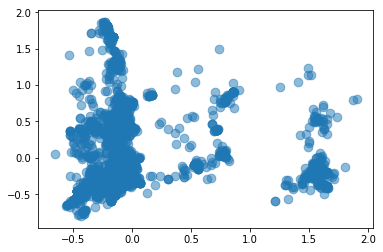

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

X = finalDf['principal component 1']
Y = finalDf['principal component 2']
plt.scatter(X, Y, s=75, alpha=.5)

In [12]:
import numpy as np

In [13]:
cluster = np.argmax(docres, axis=1)

In [14]:
{group: np.where(cluster == group)[0][:5]+1 for group in range(lda.n_topics)}

{0: array([ 14,  56,  59, 100, 108], dtype=int64),
 1: array([34, 38, 55, 66, 74], dtype=int64),
 2: array([24, 41, 49, 58, 68], dtype=int64),
 3: array([ 4,  8,  9, 10, 11], dtype=int64),
 4: array([ 2, 16, 27, 43, 46], dtype=int64),
 5: array([36, 40, 47, 54, 76], dtype=int64),
 6: array([ 39,  64,  79, 103, 132], dtype=int64),
 7: array([ 6, 20, 26, 35, 42], dtype=int64),
 8: array([ 3,  5, 32, 51, 62], dtype=int64),
 9: array([15, 57, 63, 90, 91], dtype=int64),
 10: array([ 7, 12, 44, 52, 72], dtype=int64),
 11: array([29, 37, 45, 83, 84], dtype=int64),
 12: array([21, 23, 25, 28, 30], dtype=int64),
 13: array([17, 18, 19, 22, 33], dtype=int64),
 14: array([ 1, 13, 48, 67, 69], dtype=int64)}

In [15]:
list(range(lda.n_topics))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [16]:
lda.transform(df_name)

array([[0.01111114, 0.01111111, 0.01111111, ..., 0.01111111, 0.01111111,
        0.63244714],
       [0.00833333, 0.00833333, 0.00833333, ..., 0.00833335, 0.14152862,
        0.00833334],
       [0.00833333, 0.00833335, 0.34805925, ..., 0.00833334, 0.00833334,
        0.00833339],
       ...,
       [0.10452032, 0.00266667, 0.00266667, ..., 0.00266667, 0.00266667,
        0.00266668],
       [0.00833333, 0.00833333, 0.00833333, ..., 0.00833333, 0.00833333,
        0.00833333],
       [0.00833333, 0.00833334, 0.531028  , ..., 0.00833333, 0.00833334,
        0.00833334]])

In [23]:
list(enumerate(lda.components_))

[(0, array([0.06666674, 0.06666667, 1.06666649, ..., 0.0666667 , 0.06666667,
         0.06666676])),
 (1, array([0.06666675, 0.06666673, 0.06666667, ..., 0.06666676, 0.06666667,
         0.06666691])),
 (2, array([0.06666677, 0.06666672, 0.06666667, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (3, array([0.06666673, 0.06666668, 0.06666672, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (4, array([0.06666678, 0.06666667, 0.06666673, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (5, array([0.06666677, 0.06666671, 0.06666667, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (6, array([3.91285804, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (7, array([0.06666669, 0.06666667, 0.06666667, ..., 0.06666674, 0.06666684,
         0.06666667])),
 (8, array([0.06666668, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
         0.06666667])),
 (9, array([0.0666667 , 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
         0.066